## Overview
This notebook is a step by step to calculate the degrees from semi-circular trajectory data

### Steps
1. grab the first point in the trajectory data 720 615 #(964, 480)
2. grab the last point in the trajectory data and loop through every trial
3. convert the origin 720 615 to (0,0) - which will give you an updated coordinate
4. using this updated coordinate, transfor it to polar coordinates, which will give you the degree of the data point


In [ ]:
load data

add subject number
extract relevant columns
concat data, axis 0
average degree

In [421]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import math

### load data

In [490]:
sublist = [ 96, 97, 99]
# FIRST IMPORT (CREATE RESULT DATA FRAME)
main_dir = '/Users/h/Documents/projects_local/social_influence'
metafilename = main_dir + '/data/sub-095/metadata' + os.sep + 'sub-095_task-cognitive_meta_beh.csv'


# result = pd.read_csv(metafilename, usecols=['image_filename','administer','match','p5_responseKey','cue_type','ptb_coord_x','ptb_coord_y'])
# result['sub_num'] = 95

df = pd.DataFrame()
result = pd.DataFrame()

for ind,sub in enumerate(sublist):
    loadfilename =  main_dir + '/data/sub-0' + str(sub) + '/metadata' + os.sep + 'sub-0' + str(sub) + '_task-cognitive_meta_beh.csv'
    df = pd.read_csv(loadfilename, usecols=['image_filename','administer','match','p5_responseKey','cue_type','ptb_coord_x','ptb_coord_y'])
    df['sub_num'] = sub
    result = pd.concat([result, df], axis = 0, sort = True)


In [491]:
# step 3
result['new_ptb_coord_x'] = result['ptb_coord_x'] - 720
result['new_ptb_coord_y'] = abs(result['ptb_coord_y'] - 615)

# plotting 

In [492]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

result['r'], result['theta'] = cart2pol(result['new_ptb_coord_x'], result['new_ptb_coord_y'])

In [508]:
max(result['r'])

269.8060424682297

### REMOVE plot original attempt

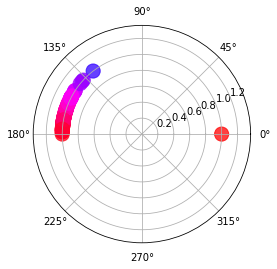

In [493]:
# Compute areas and colors

colors = result['theta']
result['newr'] = np.ones(result.r.shape)
area = 200 * result['newr']**2
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(result['theta'], result['newr'], c=colors, s=area, cmap='hsv', alpha=0.75)

### REMOVE plot groupby attempt 1. raw form?

Text(0.5, 0.8, 'Cognitive task\n rating on semi-circular scale')

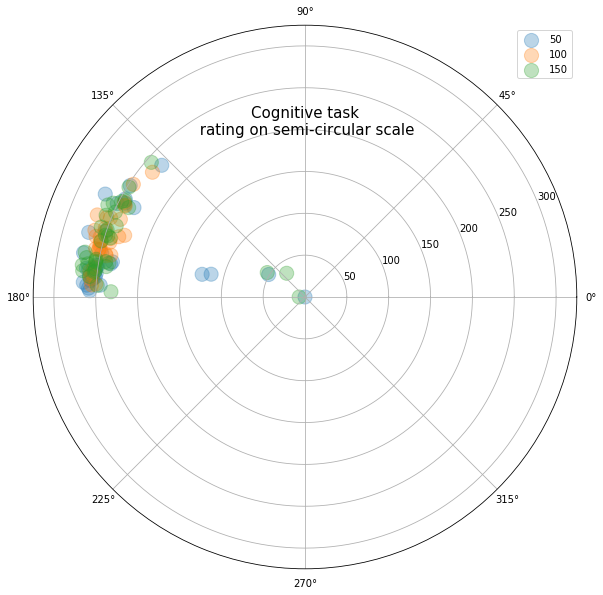

In [510]:

colors = result['theta']

# area = 200 * result['newr']**2
area = 200 * result['newr']**2

groups = result.groupby('administer')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
# ax.set_thetamax(180)

for name, group in groups:
    ax.scatter(group.theta, group.r,label=name, alpha=0.30, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
ax.legend()

figure_title = "Cognitive task\n rating on semi-circular scale"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)
#  marker='o', linestyle='', ms=12,

### plot groupby attempt 

Text(0.5, 0.8, 'Cognitive task\n rating on semi-circular scale per degree')

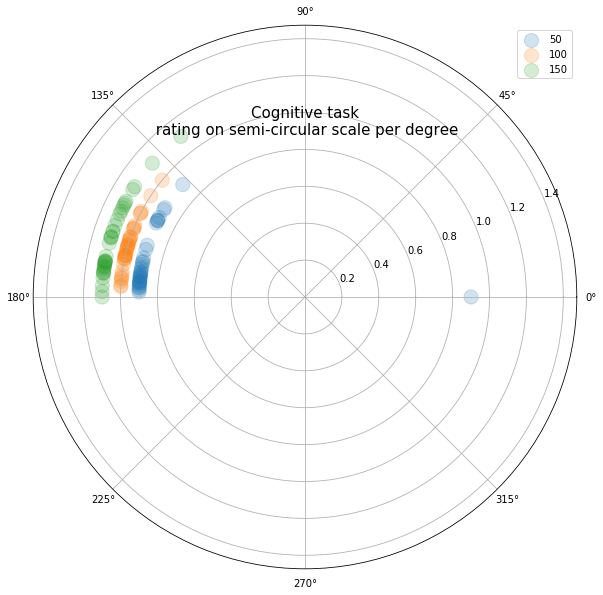

In [506]:

# Compute areas and colors

colors = result['theta']
result['newr'] = np.ones(result.r.shape)

area = 200 * result['newr']**2

# groups = result.groupby('administer')
group50 = result[result['administer'] ==50]
group100 = result[result['administer'] ==100]
group150 = result[result['administer'] ==150]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
# ax.set_thetamax(180)
p50 = ax.scatter(group50.theta, np.ones(group50.newr.shape)*0.9,label=50, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p100 = ax.scatter(group100.theta, np.ones(group100.newr.shape),label=100, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p150 = ax.scatter(group150.theta, np.ones(group150.newr.shape)*1.1,label=150, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
figure_title = "Cognitive task\n rating on semi-circular scale per degree"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)


# participant mean

In [433]:
group_mean = result.groupby(['administer','sub_num']).mean().reset_index()

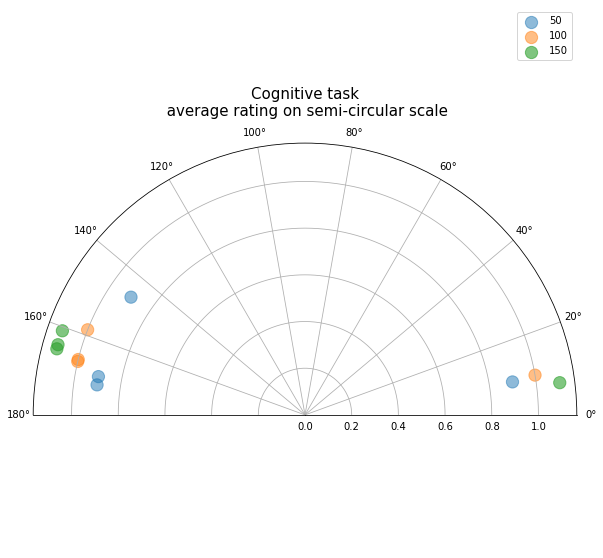

In [502]:


# Compute areas and colors

colors = group_mean['theta']
group_mean['newr'] = np.ones(group_mean.r.shape)
# area = 200 * result['newr']**2
area = 150 * group_mean['newr']**2


# groups = group_mean.groupby('administer')

group_mean_50 = group_mean[group_mean['administer'] ==50]
group_mean_100 = group_mean[group_mean['administer'] ==100]
group_mean_150 = group_mean[group_mean['administer'] ==150]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)
# for name, group in groups:
#     ax.scatter(group.theta, group.newr_random,label=name, alpha=0.30, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
# ax.legend()
#  marker='o', linestyle='', ms=12,
figure_title = "Cognitive task\n average rating on semi-circular scale"
plt.text(0.5,0.8, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)


p50 = ax.scatter(group_mean_50.theta, np.ones(group_mean_50.newr.shape)*0.9,label=50, alpha=0.50, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p100 = ax.scatter(group_mean_100.theta, np.ones(group_mean_100.newr.shape),label=100, alpha=0.50, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p150 = ax.scatter(group_mean_150.theta, np.ones(group_mean_150.newr.shape)*1.1,label=150, alpha=0.60, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
ax.legend()

# RT

In [385]:
sublist = [ 96, 97, 99]
# FIRST IMPORT (CREATE RESULT DATA FRAME)
main_dir = '/Users/h/Documents/projects_local/social_influence'
metafilename = main_dir + '/data/sub-095/metadata' + os.sep + 'sub-095_task-cognitive_meta_beh.csv'


result = pd.read_csv(metafilename , usecols=['image_filename','administer','match','p5_responseKey', 'p6_decisionRT', 'cue_type','ptb_coord_x','ptb_coord_y'])
result['sub_num'] = 95



for ind,sub in enumerate(sublist):
    loadfilename =  main_dir + '/data/sub-0' + str(sub) + '/metadata' + os.sep + 'sub-0' + str(sub) + '_task-cognitive_meta_beh.csv'
    df = pd.read_csv(loadfilename, usecols=['image_filename','administer','match','p5_responseKey','p6_decisionRT','cue_type','ptb_coord_x','ptb_coord_y'])
    df['sub_num'] = sub
    result = pd.concat([result, df], axis = 0)


In [386]:
group_mean = result.groupby(['administer','sub_num']).mean().reset_index()

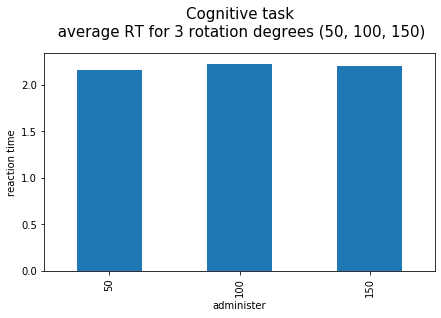

In [420]:
fig, ax = plt.subplots(figsize=(7,4))
figure_title = "Cognitive task\n average RT for 3 rotation degrees (50, 100, 150)"
plt.text(0.5, 1.08, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)
plt.ylabel('reaction time', size = 10)
group_mean.groupby(['administer']).mean()['p6_decisionRT'].plot.bar(ax = ax) #(x = 'administer', y = 'p6_decisionRT', rot = 0)

# PAIN

In [511]:
sublist = [95, 96, 97]
# FIRST IMPORT (CREATE RESULT DATA FRAME)
main_dir = '/Users/h/Documents/projects_local/social_influence'
metafilename = main_dir + '/data/sub-095/metadata' + os.sep + 'sub-095_task-pain_meta_beh.csv'

pain_result = pd.DataFrame()
# pain_result = pd.read_csv(metafilename, usecols=['administer','ptb_coord_x','ptb_coord_y', 'p6_decisionRT'])
# pain_result['sub_num'] = 95



for ind,sub in enumerate(sublist):
    loadfilename =  main_dir + '/data/sub-0' + str(sub) + '/metadata' + os.sep + 'sub-0' + str(sub) + '_task-pain_meta_beh.csv'
    df = pd.read_csv(loadfilename, usecols=['administer','ptb_coord_x','ptb_coord_y', 'p6_decisionRT'])
    df['sub_num'] = sub
    pain_result = pd.concat([pain_result, df], axis = 0, sort = True)

    # step 3
pain_result['new_ptb_coord_x'] = pain_result['ptb_coord_x'] - 720
pain_result['new_ptb_coord_y'] = abs(pain_result['ptb_coord_y'] - 615)



In [512]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

r, theta= cart2pol(pain_result['new_ptb_coord_x'],pain_result['new_ptb_coord_y'])

pain_result['theta'] = theta
pain_result['r'] = r

# raw form

Text(0.5, 0.8, 'Pain - raw form rating')

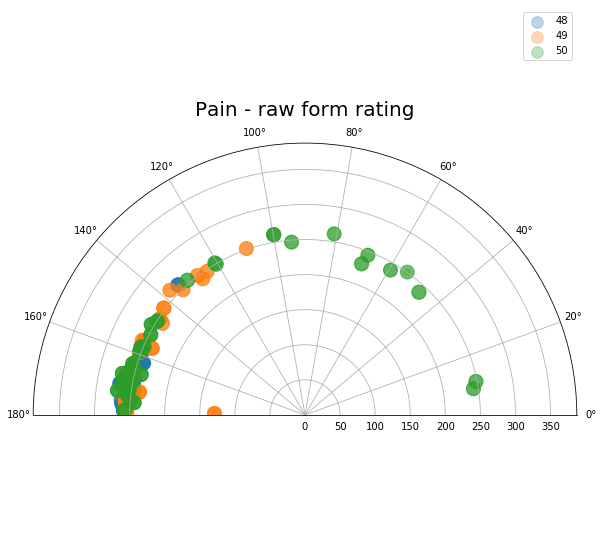

In [513]:
colors = pain_result['theta']
area = 0.003 * pain_result['r']**2
groups = pain_result.groupby('administer')
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)

for name, group in groups:
    ax.scatter(group.theta, group.r,label=name, alpha=0.30, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
ax.legend()

figure_title = "Pain - raw form rating"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=20,
         transform = ax.transAxes)

# nonraw form

Text(0.5, 0.8, 'Pain - rating on semi-circle')

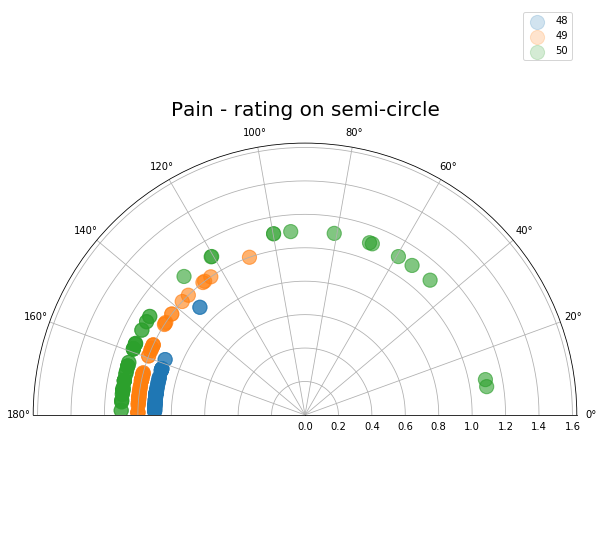

In [514]:

# Compute areas and colors

colors = pain_result['theta']
pain_result['newr'] = np.ones(pain_result.r.shape)

area = 200 * pain_result['newr']**2

# groups = result.groupby('administer')
group48 = pain_result[pain_result['administer'] ==48]
group49 = pain_result[pain_result['administer'] ==49]
group50 = pain_result[pain_result['administer'] ==50]

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)

# for name, group in groups:
#     ax.scatter(group.theta, np.ones(group.newr_random.shape),label=name, alpha=0.10, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p48 = ax.scatter(group48.theta, np.ones(group48.newr.shape)*0.9,label=48, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p49 = ax.scatter(group49.theta, np.ones(group49.newr.shape),label=49, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p50 = ax.scatter(group50.theta, np.ones(group50.newr.shape)*1.1,label=50, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

figure_title = "Pain - rating on semi-circle"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=20,
         transform = ax.transAxes)

# VICARIOUS

In [520]:
sublist = [96, 97,99]
v_result = pd.DataFrame()
# FIRST IMPORT (CREATE RESULT DATA FRAME)
main_dir = '/Users/h/Documents/projects_local/social_influence'
metafilename = main_dir + '/data/sub-095/metadata' + os.sep + 'sub-095_task-vicarious_meta_beh.csv'

for ind,sub in enumerate(sublist):
    for ver in range(1,3):
        loadfilename =  main_dir + '/data/sub-0' + str(sub) + '/metadata' + os.sep + 'sub-0' + str(sub) + '_task-vicarious_' + str(ver) + '_meta_beh.csv'
        df = pd.read_csv(loadfilename, usecols=['administer','ptb_coord_x','ptb_coord_y', 'p6_decisionRT'])
        df['sub_num'] = sub
        v_result = pd.concat([v_result, df], axis = 0, sort = False)

    # step 3
v_result['new_ptb_coord_x'] = v_result['ptb_coord_x'] - 720
v_result['new_ptb_coord_y'] = abs(v_result['ptb_coord_y'] - 615)



In [521]:
min(v_result['new_ptb_coord_y'])

0.0

NameError: name 'high' is not defined

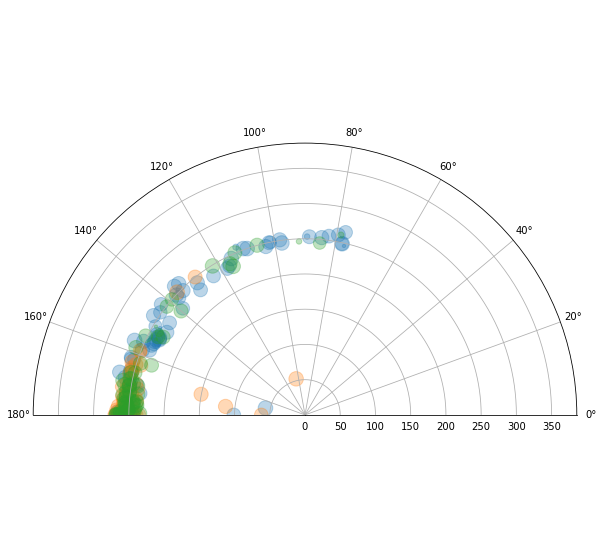

In [528]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

v_result['r'], v_result['theta'] = cart2pol(v_result['new_ptb_coord_x'], v_result['new_ptb_coord_y'])

colors = v_result['theta']
area = 0.003 * v_result['r']**2
# area = 0.004 * v_result['newr_random']**2

groups = v_result.groupby('administer')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)

for name, group in groups:
    ax.scatter(group.theta, group.r,label=name, alpha=0.30, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 

figure_title = "Vicarious task\n rating on semi-circular scale"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=20,
         transform = ax.transAxes)
#  marker='o', linestyle='', ms=12,

Text(0.5, 0.8, 'vicarious pain - rating on semi-circle')

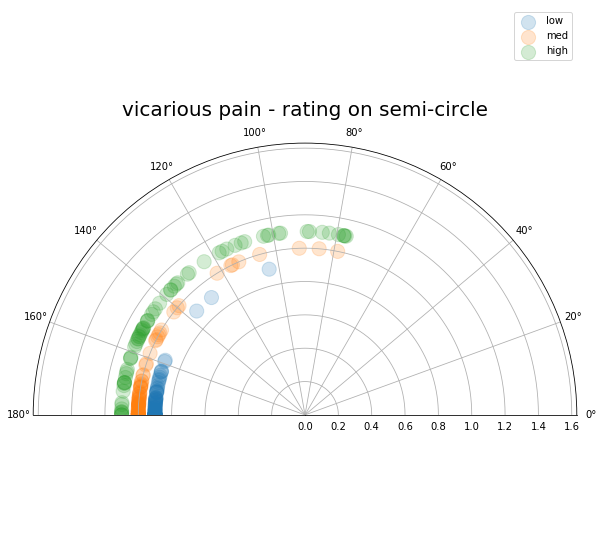

In [529]:

# Compute areas and colors

colors = v_result['theta']
v_result['newr'] = np.ones(v_result.r.shape)

area = 200 * v_result['newr']**2

# groups = result.groupby('administer')
groupl = v_result[v_result['administer'] =='low']
groupm = v_result[v_result['administer'] =='med']
grouph = v_result[v_result['administer'] =='high']

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)

# for name, group in groups:
#     ax.scatter(group.theta, np.ones(group.newr_random.shape),label=name, alpha=0.10, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
pl = ax.scatter(groupl.theta, np.ones(groupl.newr.shape)*0.9,label='low', alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
pm = ax.scatter(groupm.theta, np.ones(groupm.newr.shape),label='med', alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
ph = ax.scatter(grouph.theta, np.ones(grouph.newr.shape)*1.1,label='high', alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

figure_title = "vicarious pain - rating on semi-circle"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=20,
         transform = ax.transAxes)